In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Ler arquivo CSV corrigindo separador
df = pd.read_csv("atividade3_dataset.csv", sep=";", engine="python", on_bad_lines="skip")

# Caso venha em uma coluna única, dividir manualmente
if df.shape[1] == 1:
    df = pd.read_csv("atividade3_dataset.csv", header=None, sep="\n", engine="python", on_bad_lines="skip")
    df = df[0].str.split(";", expand=True)
    df.columns = ["ID","Nome","Idade","Cidade","Produto","Preço","Quantidade","Data_Compra"]
    if (df.iloc[0] == ["ID","Nome","Idade","Cidade","Produto","Preço","Quantidade","Data_Compra"]).all():
        df = df.iloc[1:].reset_index(drop=True)
else:
    df.columns = ["ID","Nome","Idade","Cidade","Produto","Preço","Quantidade","Data_Compra"]

df.head()


,ID,Nome,Idade,Cidade,Produto,Preço,Quantidade,Data_Compra
0,1,Mariana,48.0,FORTALEZA,Tablet,"2010,87",7,30-05-2024
1,2,Bruno,42.0,RIO DE JANEIRO,Teclado,NaN,6,12-04-2025
2,3,Ana,54.0,RIO DE JANEIRO,Monitor,3619.29,2,10-12-2022
3,4,Carlos,62.0,CURITIBA,Teclado,40415.9,8,31-12-2022
4,5,Mariana,60.0,CURITIBA,Notebook,716.66,8,14-09-2023


In [2]:

# Converter tipos
for col in ["ID","Quantidade"]:
    df[col] = pd.to_numeric(df[col], errors="coerce").astype("Int64")

for col in ["Idade","Preço"]:
    df[col] = (df[col].astype(str).str.replace(".", "", regex=False).str.replace(",", ".", regex=False))
    df[col] = pd.to_numeric(df[col], errors="coerce")

df["Data_Compra"] = pd.to_datetime(df["Data_Compra"], errors="coerce", dayfirst=True)

# Padronizar valores
def normalize_city(c):
    if not isinstance(c, str):
        return c
    c = c.strip().upper()
    if c in ["SP","SAO PAULO"]: return "SÃO PAULO"
    if c in ["RJ"]: return "RIO DE JANEIRO"
    return c

df["Cidade"] = df["Cidade"].apply(normalize_city)
df["Produto"] = df["Produto"].apply(lambda x: x.title() if isinstance(x, str) else x)

# Tratar nulos
df = df[~df["ID"].isna()].copy()
df["Nome"] = df["Nome"].fillna("Desconhecido")
df["Cidade"] = df["Cidade"].fillna("Desconhecido")
df["Produto"] = df["Produto"].fillna("Desconhecido")
df["Idade"] = df["Idade"].fillna(df["Idade"].median())
df["Preço"] = df["Preço"].fillna(df["Preço"].median())
df["Quantidade"] = df["Quantidade"].fillna(df["Quantidade"].median())

# Remover duplicados
df = df.drop_duplicates()
df.head()


,ID,Nome,Idade,Cidade,Produto,Preço,Quantidade,Data_Compra
0,1,Mariana,480.0,FORTALEZA,Tablet,2010.87,7,2024-05-30
1,2,Bruno,420.0,RIO DE JANEIRO,Teclado,256549.00,6,2025-04-12
2,3,Ana,540.0,RIO DE JANEIRO,Monitor,361929.00,2,2022-12-10
3,4,Carlos,620.0,CURITIBA,Teclado,404159.00,8,2022-12-31
4,5,Mariana,600.0,CURITIBA,Notebook,71666.00,8,2023-09-14


            Idade         Preço  Quantidade           Ticket_Total
count  501.000000  5.010000e+02       501.0                  501.0
mean   443.453094  6.019242e+13    5.750499  240769662071713.53125
std    150.184727  1.347289e+15    2.862101     5389154365991526.0
min    180.000000  5.524000e+02         1.0                  931.8
25%    320.000000  1.185780e+05         3.0               444496.0
50%    440.000000  2.565490e+05         6.0              1078096.0
75%    570.000000  3.589750e+05         8.0              2103770.0
max    700.000000  3.015640e+16        10.0   120625600000000000.0


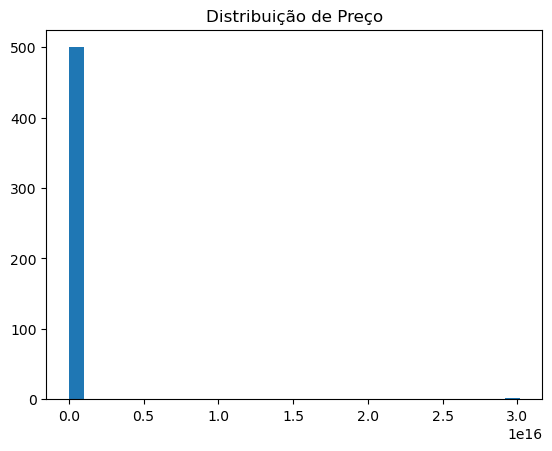

                 Idade     Preço  Quantidade  Ticket_Total
Idade         1.000000 -0.063625   -0.027305     -0.063625
Preço        -0.063625  1.000000   -0.027380      1.000000
Quantidade   -0.027305 -0.027380    1.000000     -0.027380
Ticket_Total -0.063625  1.000000   -0.027380      1.000000


In [3]:

# Criar colunas derivadas
df["Faixa_Etaria"] = pd.cut(df["Idade"], bins=[0,24,34,49,64,np.inf], labels=["<=24","25-34","35-49","50-64","65+"])
df["Ticket_Total"] = df["Preço"] * df["Quantidade"]

# Estatísticas
print(df[["Idade","Preço","Quantidade","Ticket_Total"]].describe())

# Gráfico 1: distribuição de preços
plt.hist(df["Preço"], bins=30)
plt.title("Distribuição de Preço")
plt.show()

# Gráfico 2: correlação
corr = df[["Idade","Preço","Quantidade","Ticket_Total"]].corr()
print(corr)


In [4]:

df.to_csv("base_limpa.csv", index=False)
print("Base limpa salva como base_limpa.csv")


Base limpa salva como base_limpa.csv
